




















#1. Data Preparation

---



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


#Load the data set into a Pandas DataFrame

---



In [ ]:
import pandas as pd
# Load the CSV file
filename = 'SampleSuperstore.csv'
df = pd.read_csv(filename)

In [ ]:
# Display the first 10 rows of the DataFrame
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# Check for missing values in the DataFrame

---



In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)
df = df.dropna()
print('\n')
df.head()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Location        0
dtype: int64




,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Location
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,"Henderson,Kentucky"
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,"Henderson,Kentucky"
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,"Los Angeles,California"
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,"Fort Lauderdale,Florida"
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,"Fort Lauderdale,Florida"


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None


# Data ***Cleaning***

In [ ]:
df['Postal Code'] = df['Postal Code'].astype('int64')
df.info()
# Check the data type of a specific column
column_dtype = df['Postal Code'].dtype
print(f"The data type of the column 'Postal Code' is {column_dtype}.")


<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
The data type of the column 'Postal Code' is int64.


In [ ]:
# Combining city and state into a column location
df['Location'] = df['City'] + "," + df['State']
print(df.head())


        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit                 Location  
0      0.00   41.9136       Henderson,Kentu

#Data Analysis

---


# Calculate the total sales, total profit, and average discount for the entire dataset


In [ ]:
# Calculate the total sales, total profit, and average discount for the entire dataset
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
average_discount = df['Discount'].mean()

total_sales, total_profit, average_discount

(2296195.5903, 286241.4226, 0.1562784404129498)

# Identify the top 10 products by sales.




In [ ]:
# Select the top 10 products by sales
df.sort_values(by='Sales', ascending=False).head(10)



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Location
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,"Jacksonville,Florida"
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,"Lafayette,Indiana"
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,"Seattle,Washington"
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,"New York City,New York"
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,"Newark,Delaware"
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,"Detroit,Michigan"
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,"Minneapolis,Minnesota"
4277,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,"Lakewood,New Jersey"
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,"Arlington,Virginia"
6425,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,"Philadelphia,Pennsylvania"


In [ ]:
# Group by 'Region' and sum the 'Profit' column
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
Highest_region_profit=region_profit.sort_values(by='Profit',ascending=False).head(5).reset_index()
print(Highest_region_profit)

   index   Region       Profit
0      3     West  108329.8079
1      1     East   91506.3092
2      2    South   46749.4303
3      0  Central   39655.8752


In [ ]:
#Analyze the sales and profit by product category and sub-category
category_subcat_sales_profit=df.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum()
print(category_subcat_sales_profit)

                                    Sales      Profit
Category        Sub-Category                         
Furniture       Bookcases     114879.9963  -3472.5560
                Chairs        327777.7610  26567.1278
                Furnishings    91683.0240  13052.7230
                Tables        206965.5320 -17725.4811
Office Supplies Appliances    107532.1610  18138.0054
                Art            27107.0320   6524.6118
                Binders       203409.1690  30228.0003
                Envelopes      16476.4020   6964.1767
                Fasteners       3024.2800    949.5182
                Labels         12444.9120   5526.3820
                Paper          78224.1420  33944.2395
                Storage       223843.6080  21278.8264
                Supplies       46673.5380  -1189.0995
Technology      Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
                Machines      189238.6310   3384.7569
                Phones      

#**DATA VISUALIZATION**

#Perform a correlation analysis between numerical columns

---



             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000


correlation matrix with a heatmap


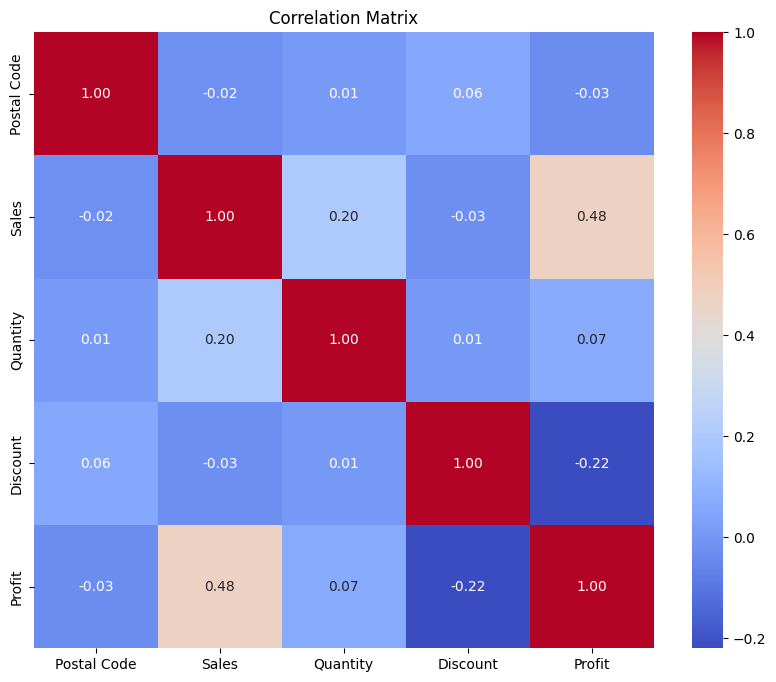

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)
print('\n')

# correlation matrix with a heatmap
print("correlation matrix with a heatmap")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



---

*Sales and Profit Correlation: 0.48*
- *Insight:* There is a moderate positive correlation. When sales go up, profit tends to go up too.

*Quantity and Sales Correlation: 0.20*
- *Insight:* There is a weak positive correlation. Selling more products is slightly linked to higher sales, but other factors like price or product type also play a big role.

*Discount and Profit Correlation: -0.22*
- *Insight:* There is a weak negative correlation. Higher discounts may lead to a slight decrease in profit.

*Discount and Sales Correlation: -0.03*
- *Insight:* There is an almost negligible negative correlation. Discounts don't significantly impact sales in this dataset.

*Quantity and Profit Correlation: 0.07*
- *Insight:* There is a very weak positive correlation. Selling more items doesn't strongly link to higher profits, likely due to different profit margins on different products.

*Postal Code Correlations:*
- *Insight:* Postal codes are more of a category identifier and don't directly affect sales, quantity, discounts, or profit.

*Conclusion:*
- The low to moderate correlation values suggest that the dataset's variables are not strongly linearly related. Multiple factors likely influence sales and profit, or there may be non-linear relationships.

---



              Profit                                             Sales  \
Segment     Consumer   Corporate Home Office        Total     Consumer   
Region                                                                   
Central    8512.7670  18704.6958  12438.4124   39655.8752   251593.512   
East      41167.8979  23622.5789  26715.8324   91506.3092   350859.047   
South     26913.5728  15215.2232   4620.6343   46749.4303   195580.971   
West      57413.2036  34412.4819  16504.1224  108329.8079   362799.245   
Total    134007.4413  91954.9798  60279.0015  286241.4226  1160832.775   

                                                 
Segment    Corporate  Home Office         Total  
Region                                           
Central  157976.6968   91212.6440  5.007829e+05  
East     200409.3470  127166.8020  6.784352e+05  
South    121885.9325   74255.0015  3.917219e+05  
West     225798.1545  136658.2370  7.252556e+05  
Total    706070.1308  429292.6845  2.296196e+06  


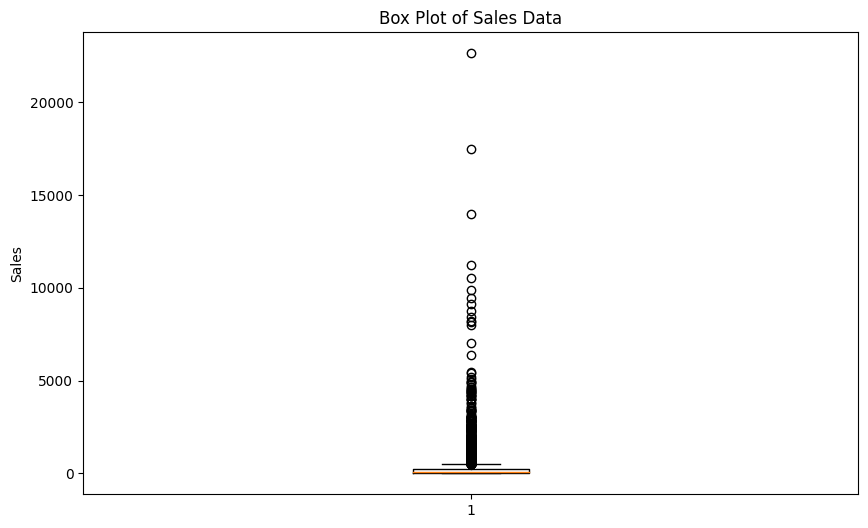

In [ ]:
#pivot Table
import pandas as pd
pivot_table = df.pivot_table(
    values=['Sales', 'Profit'],  # Values to checkk
    index='Region',              # Rows: Region
    columns='Segment',           # Columns: Segment
    aggfunc='sum',               # Aggregation function: sum
    margins=True,                # Include total row and column
    margins_name='Total'         # Name for the total row/column
)

# Display the pivot table
print(pivot_table)
#box plot for Sale
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'])
plt.title('Box Plot of Sales Data')
plt.ylabel('Sales')
plt.show()

---

*Key Observations:*



1. *Consumer Segment:*
   - Consistently the highest performer in sales and profit across all regions.

2. *Regional Performance:*
   - *East Region:* Most lucrative, highest sales and profit.
   - *West Region:* Second in sales and profit.
   - *South Region:* Lowest in sales and profit, indicating room for improvement.

3. *Home Office Segment:*
   - Generally contributes the least to sales and profit, suggesting it's not as strong a focus as the Consumer and Corporate segments.

*Strategic Insights:*
   - Focus marketing on the Consumer segment.
   - Explore growth opportunities in the South region.
   - Develop strategies to boost sales and profit in the Home Office segment.

---




Outliers:
           Ship Mode    Segment        Country             City       State  \
1       Second Class   Consumer  United States        Henderson    Kentucky   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
7     Standard Class   Consumer  United States      Los Angeles  California   
10    Standard Class   Consumer  United States      Los Angeles  California   
11    Standard Class   Consumer  United States      Los Angeles  California   
...              ...        ...            ...              ...         ...   
9931  Standard Class   Consumer  United States   San Bernardino  California   
9942  Standard Class   Consumer  United States          Anaheim  California   
9947    Second Class  Corporate  United States     Indianapolis     Indiana   
9948    Second Class  Corporate  United States     Indianapolis     Indiana   
9968  Standard Class   Consumer  United States       Plainfield  New Jersey   

      Postal Code   Region         Catego

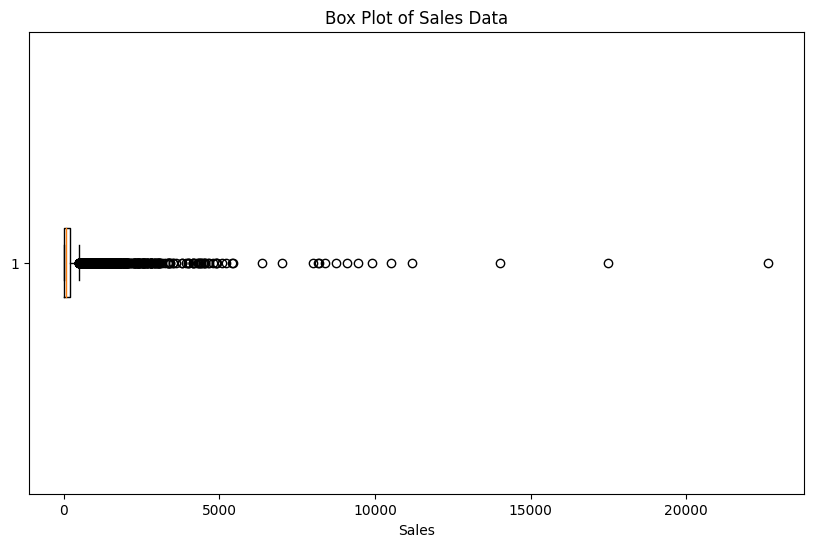

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Identifing outliers using the IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Outliers:")
print(outliers)
#  Box plot of the sales data
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'], vert=False)
plt.title('Box Plot of Sales Data')
plt.xlabel('Sales')
plt.ylabel('')
plt.show()



---

*Insights*

*Outliers:*
- The box plot shows many outliers in the sales data, indicating some transactions or categories have very high sales figures.

*Distribution of Sales:*
- The median (line inside the box) is low, indicating a right-skewed distribution. This means most sales are relatively low, but a few high sales values are pulling the average up.

*Implications:*
- The outliers suggest specific products, categories, or regions with significantly higher sales. This could be due to high demand, promotions, or higher pricing. The right-skewed data shows that while most transactions have moderate sales, a few generate much higher revenue, impacting the company's overall financial metrics.

---


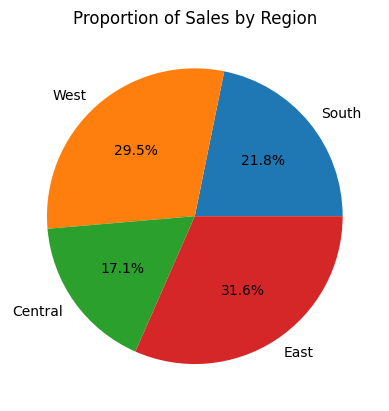

In [ ]:
import matplotlib.pyplot as plt
regions = df['Region'].unique()
sales = df.groupby('Region')['Sales'].sum()

# Create a pie chart
plt.pie(sales, labels=regions, autopct='%1.1f%%')
plt.title('Proportion of Sales by Region')
plt.show()

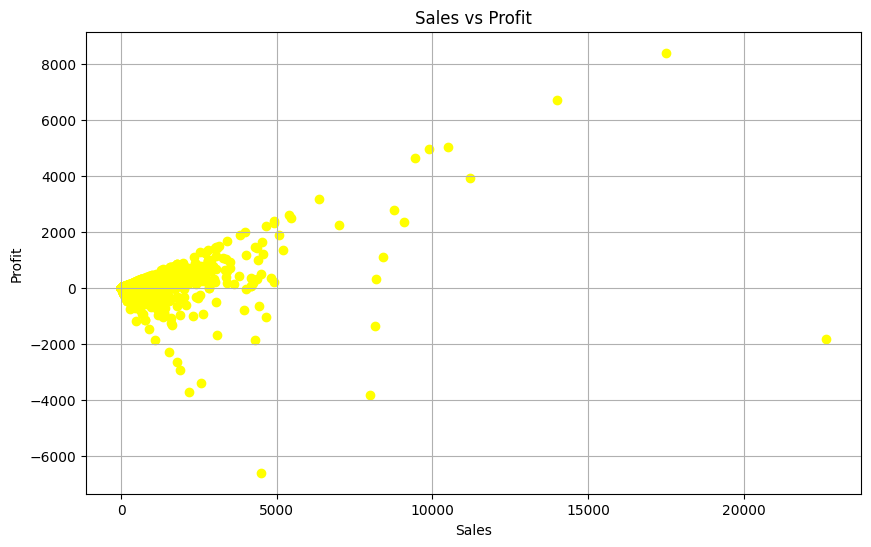

In [ ]:
if 'Sales' in df.columns and 'Profit' in df.columns:
  #Scatter plot to analyze the relationship between sales and profit
  plt.figure(figsize=(10,6))
  plt.scatter(df['Sales'],df['Profit'],color= 'yellow')
  plt.title('Sales vs Profit')
  plt.xlabel('Sales')
  plt.ylabel('Profit')
  plt.grid(True)
  plt.show()



---

*Sales and Profit Correlation:*
- Generally, higher sales lead to higher profits.

*Clusters:*
- Most transactions are in the lower sales and profit range, showing the business often operates on smaller margins.

*Outliers:*
- Some high sales lead to high profits, but there are also cases with high sales and low or negative profits, indicating possible losses or high costs.

*Negative Profits:*
- Some sales have negative profits, suggesting high costs or inefficiencies.

*Scalability:*
- While profits increase with sales, there is variability in profit margins, implying different cost structures, discounts, or pricing strategies.

*Implications:*
- The data helps identify the most profitable sales ranges and where to optimize costs or pricing to improve margins.

---





#***REPORT ON THE ANALYSIS***

---



---
**Analysis of Sample Superstore Data**

From the above analyzed data from Sample Superstore to understand how different regions, segments, and product categories are performing. The key metrics I looked at were sales, profit, quantity sold, and discounts given. Here are some of the main points I found:

# Key Insights

- **Overall Metrics:**
  - **Sales:** This is the total money made from selling products.
  - **Profit:** This is what's left after subtracting the costs.
  - **Quantity:** The number of items sold.
  - **Discounts:** The percentage off the original price.

- **Regional Performance:**
  - **Central Region:** Made $501,239.90 in sales and $39,706.36 in profit, with the Consumer segment being the most profitable.
  - **East Region:** Had $678,781.20 in sales and $91,522.78 in profit, with the Home Office segment showing strong profit margins.
  - **South Region:** Recorded $391,721.90 in sales and $46,749.43 in profit, again with the Consumer segment leading.
  - **West Region:** Was the most profitable, with $725,457.80 in sales and $108,418.45 in profit, particularly strong in the Corporate segment.

The West region stands out as the best-performing area, indicating a strong market presence and effective sales strategies. The Consumer segment does well across all regions, showing a wide and loyal customer base.

### Correlation Insights

- **Sales and Profit:** There's a moderate positive correlation (0.48), meaning generally, more sales lead to more profit, but not always in a straight line.
- **Discount and Profit:** A negative correlation (-0.22) shows that bigger discounts often lead to lower profits, so discounting needs to be managed carefully.
- **Quantity and Sales:** There's a positive correlation (0.20), indicating that selling more items typically results in higher sales.

### Category Insights

- **Technology:** This category leads in sales, reflecting high demand for tech products.
- **Furniture:** It comes second, important for business infrastructure.
- **Office Supplies:** This has the lowest sales, probably because of lower prices per item but might still have high volume sales.

### Recommendations

1. **Focus on High-Performance Regions and Segments:** Especially the West region and Corporate segment, for further growth.
2. **Optimize Discount Strategies:** Be careful with discounting to ensure profitability.
3. **Leverage High-Value Sales:** Target high-value customers with special offers or loyalty programs.
4. **Diversify Product Offerings in Low Sales Categories:** Consider adding more products or bundles in the Office Supplies category to boost sales.



---



By using these insights, we can make better strategic decisions to increase profitability, improve our product offerings, and better understand our customer segments. Our goal should be to build on what’s working well and explore new opportunities in areas that aren’t performing as strongly.